# Diamonds Price Prediction - Ordinal

#### In this notebook we will follow with the implemenation of linear models in the diamonds dataset

In [1]:
#import general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/diego/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Training Data

In [2]:
traindf = pd.read_csv("OUTPUT/cleaned_train.csv")
print(traindf.shape)
traindf.head()

(40339, 9)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume
0,0,1.21,Ideal,H,VS2,63.0,57.0,6134,190.734930
1,1,0.28,Very Good,D,VVS2,64.0,56.0,532,45.921708
2,2,0.42,Premium,F,VS1,61.2,58.0,1103,69.338592
3,3,0.26,Ideal,H,IF,61.1,57.0,600,43.362176
4,4,1.10,Good,G,SI1,63.4,57.0,4997,176.802840


#### To implement linear models in our data we need int instead of categories

## Ordinal Version

In [3]:
train_ord = traindf.iloc[:,1:]

In [4]:
cut_dict = {
    "Fair":1, 
    "Good":2, 
    "Very Good":3, 
    "Premium":4, 
    "Ideal":5
}

color_dict = {
    "J":1,
    "I":2,
    "H":3, 
    "G":4, 
    "F":5, 
    "E":6, 
    "D":7
}

clarity_dict = {
    "I1":1, 
    "SI2":2, 
    "SI1":3, 
    "VS2":4, 
    "VS1":5,
    "VVS2":6,
    "VVS1":7,
    "IF":8
}

train_ord.cut = train_ord.cut.map(cut_dict)
train_ord.color = train_ord.color.map(color_dict)
train_ord.clarity = train_ord.clarity.map(clarity_dict)

In [5]:
train_ord.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.21,5,3,4,63.0,57.0,6134,190.734930
1,0.28,3,7,6,64.0,56.0,532,45.921708
2,0.42,4,5,5,61.2,58.0,1103,69.338592
3,0.26,5,3,8,61.1,57.0,600,43.362176
4,1.10,2,4,3,63.4,57.0,4997,176.802840


#### But before implementing the linear models, we have to check 3 steps:
    - Correlation between variables
    - How each independent variable explain price
    - If we need to scale our data

Text(0.5, 1.0, 'Correlation matrix')

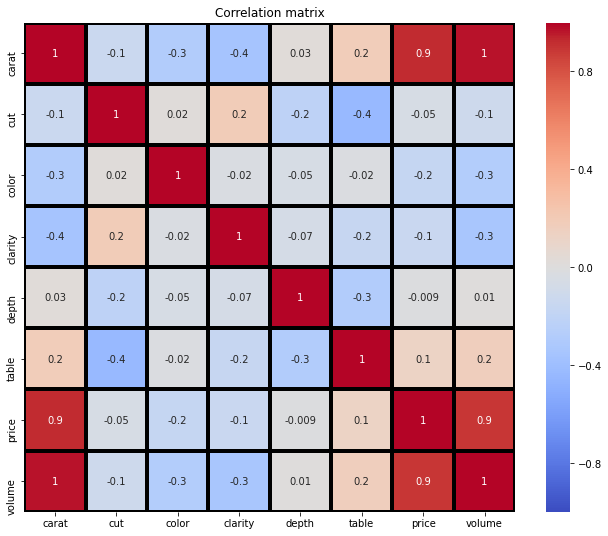

In [6]:
plt.figure(figsize=(11,9))

sns.heatmap(train_ord.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm' , linewidths=3, linecolor='black')

plt.title('Correlation matrix')

#### As we have seen in the descriptive analysis, the price is highly correlated with carat and volume and also these to independet variables too. The problem with the corr between the 2 independent variables is that it causes the predictive coefficients to be unstable, because the "independent variables" have become "dependent". So we are going to do an OLS regression using statsmodels, to check the effect of the independent variables on the dependent one

In [7]:
X_t = train_ord.drop(columns={"price"})
y_t = train_ord.price

In [8]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.eval_measures import rmse

X = X_t
X = sm.add_constant(X_t)
y = y_t
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
resi = rmse(y, y_pred)
print(resi)
model.summary()

1222.959824435647


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 5.529e+04
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        18:06:13   Log-Likelihood:            -3.4401e+05
No. Observations:               40339   AIC:                         6.880e+05
Df Residuals:                   40331   BIC:                         6.881e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3171.9144    444.239     -7.140      0.000   -4042.633   -2301.196
carat       8687.8685     54.754    158.670      0.000    8580.549    8795.188
cut          117.6842      6.641     17.720      0.000     104.667     130.701
color        318.5792      3.791     84.042      0.000     311.149     326.009
clarity      524.7211      4.049    129.583      0.000     516.784     532.658
depth        -40.9819      4.912     -8.344      0.000     -50.609     -31.355
table        -24.3823      3.418     -7.134      0.000     -31.081     -17.683
volume         0.9283      0.326      2.851      0.004       0.290       1.566
==============================================================================
Omnibus:                     7986.505   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126048.248
Skew:                           0.512   Prob(JB):                         0.00
Kurtosis:                      11.599   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As opposite to the dummy version, in the ordinal version all vars seems to be important to predict price, as all p-values are under 1% confidence level

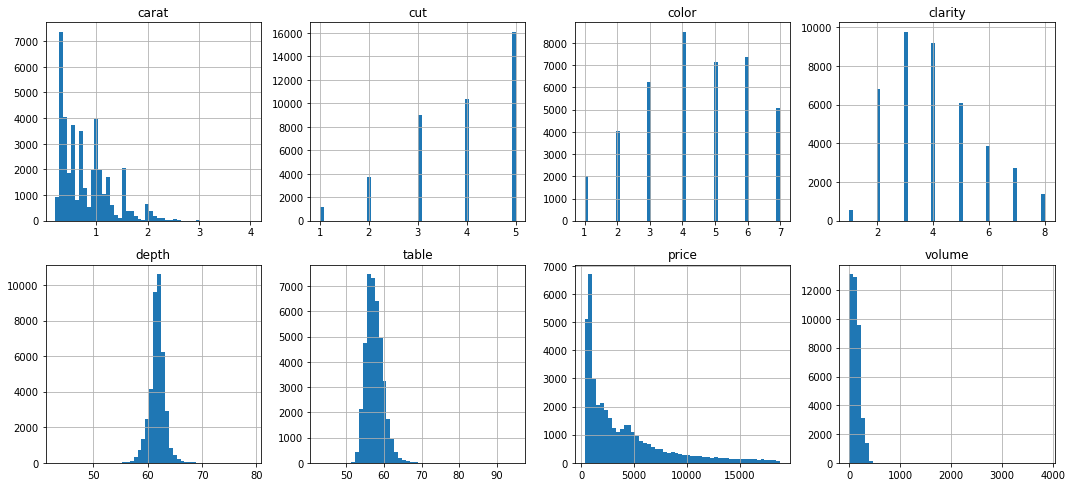

In [9]:
X_notdum = train_ord

figure = plt.figure(figsize=(15,10))

for n, col in enumerate(X_notdum.columns):
    ax = figure.add_subplot(3,4,n+1)
    ax.set_title(col)
    X_notdum[col].hist(ax=ax, bins=50)
    
figure.tight_layout() #this feature separate the graphs correctly
plt.show()

#### We can see there is a big difference between the values of the explanatory variables so it is better to scale our data

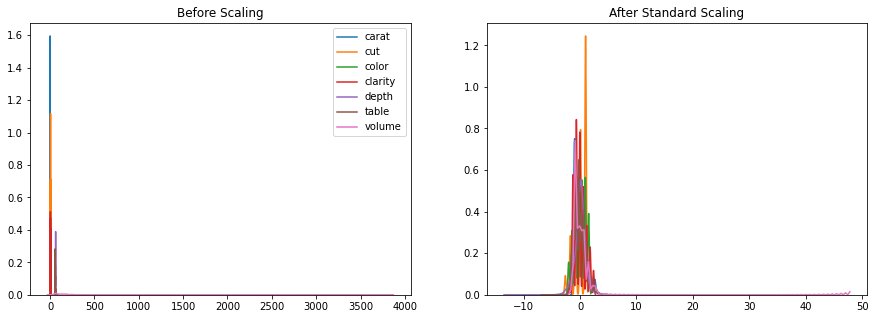

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

Xss = sc_X.fit_transform(X_t)

train_SS = pd.DataFrame(Xss, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'volume'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X_t.columns:
    sns.kdeplot(X_t[e], ax=ax1)
ax2.set_title('After Standard Scaling')
for e in train_SS.columns:
    sns.kdeplot(train_SS[e], ax=ax2, legend=None)
plt.show()

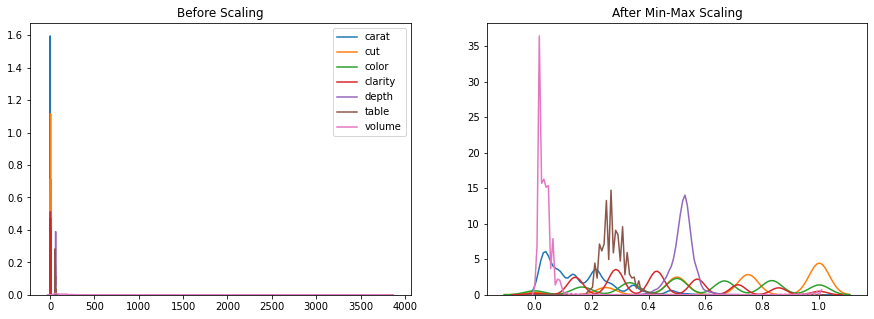

In [11]:
from sklearn.preprocessing import MinMaxScaler
mmc_X = MinMaxScaler()

Xmm = mmc_X.fit_transform(X_t)

train_MM = pd.DataFrame(Xmm, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'volume'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
ax1.set_title('Before Scaling')
for e in X_t.columns:
    sns.kdeplot(X_t[e], ax=ax1)
ax2.set_title('After Min-Max Scaling')
for e in train_MM.columns:
    sns.kdeplot(train_MM[e], ax=ax2, legend=None)
plt.show()

#### After processing the data, the standard scaler looks better to train our models

In [12]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split

X = train_SS
y = np.ravel(y_t) #we use np.ravel to change shape (x,1) to (x,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32271, 7) (8068, 7) (32271,) (8068,)


In [13]:
#1st select the splited X and y. Then after your model achieves the accuracy needed, train with 100% X and y
#However if you thing you could be overfitting your data you can use the splited model to test
# X, y ----- X_train, y_train
X_training = X_train
y_training = y_train

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression(fit_intercept=True, normalize=False)

lreg.fit(X_training, y_training) 
  
lreg_pred = lreg.predict(X_test)

In [15]:
lreg_r2 = lreg.score(X_test, y_test)

lreg_rmse = mean_squared_error(y_test, lreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",lreg_r2,"rmse:",lreg_rmse)

r2: 0.897970529749004 rmse: 1291.278461890041


#### Check for Heteroskedasticity --> there will be if the residuals don't have a constant variance

Text(0.5, 1.0, 'Residual plot')

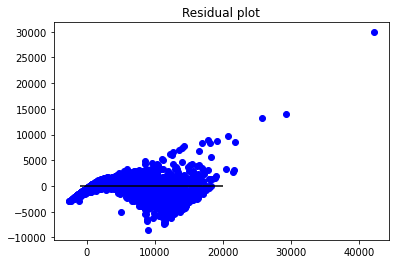

In [16]:
plt.scatter(lreg_pred, (lreg_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=20000)

plt.title('Residual plot')

#### We can see there is Heteroskedasticity as the variance of the residuals get broader when x rises, so we will use a polynomial feature to avoid it

### Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree = 3) 
X_poly = poly_f.fit_transform(X_training) 
  
polyreg = LinearRegression()
polyreg.fit(X_poly, y_training) 

poly_pred = polyreg.predict(poly_f.fit_transform(X_test))

In [18]:
poly_r2 = polyreg.score(poly_f.fit_transform(X_test), y_test)

poly_rmse = mean_squared_error(y_test, poly_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",poly_r2,"rmse:",poly_rmse)

r2: -164.59669091586036 rmse: 52021.50572453752


Text(0.5, 1.0, 'Residual plot')

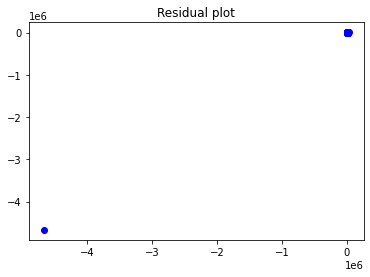

In [19]:
plt.scatter(poly_pred, (poly_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=20000)

plt.title('Residual plot')

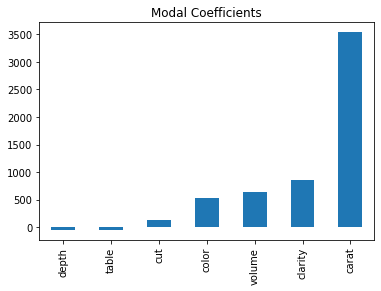

In [20]:
predictors = X_training.columns

coef = pd.Series(lreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### After applying the polynomial feature, we see a great improvement in the rmse. As opposite to the dummy version, with ordinal values the polynomial methods works correctly

### Ridge Regression 

In [21]:
from sklearn.linear_model import Ridge

ridreg = Ridge(fit_intercept=True, normalize=False, alpha=0.01)

ridreg.fit(X_training, y_training) 

ridreg_pred = ridreg.predict(X_test)

In [22]:
rid_r2 = ridreg.score(X_test, y_test)

ridreg_rmse = mean_squared_error(y_test, ridreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",rid_r2,"rmse:",ridreg_rmse)

r2: 0.8979681373465574 rmse: 1291.293600847612


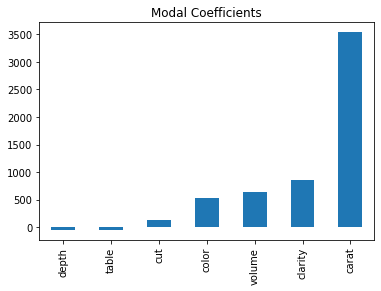

In [23]:
predictors = X_training.columns

coef = pd.Series(ridreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Lasso Regression

In [24]:
from sklearn.linear_model import Lasso

lassreg = Lasso(fit_intercept=True, normalize=True, alpha=0.01)

lassreg.fit(X_training, y_training) 

lassreg_pred = lassreg.predict(X_test)

In [25]:
lass_r2 = lassreg.score(X_test, y_test)

lassreg_rmse = mean_squared_error(y_test, lassreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",lass_r2,"rmse:",lassreg_rmse)

r2: 0.8982167179455625 rmse: 1289.7196499534396


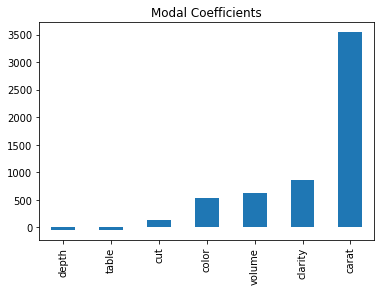

In [26]:
predictors = X_training.columns

coef = pd.Series(lassreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Elastic Net Regression

In [27]:
from sklearn.linear_model import ElasticNet

enetreg = ElasticNet(fit_intercept=True, normalize=False, alpha=0.01, l1_ratio=0.5)

enetreg.fit(X_training, y_training) 

enetreg_pred = enetreg.predict(X_test)

In [28]:
enet_r2 = enetreg.score(X_test, y_test)

enet_rmse = mean_squared_error(y_test, enetreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",enet_r2,"rmse:",enet_rmse)

r2: 0.8711028722265262 rmse: 1451.3719029504985


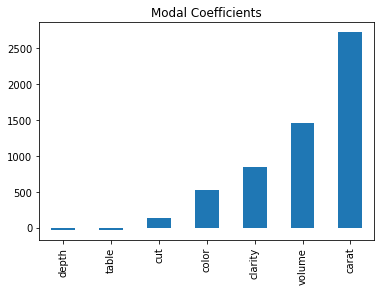

In [29]:
predictors = X_training.columns

coef = pd.Series(enetreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### LARS

In [30]:
from sklearn.linear_model import LassoLars

LARSreg = LassoLars(fit_intercept=True, normalize=False, alpha=0.01)

LARSreg.fit(X_training, y_training) 

LARSreg_pred = LARSreg.predict(X_test)

In [31]:
LARS_r2 = LARSreg.score(X_test, y_test)

LARS_rmse = mean_squared_error(y_test, LARSreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",LARS_r2,"rmse:",LARS_rmse)

r2: 0.897970226615313 rmse: 1291.280380108937


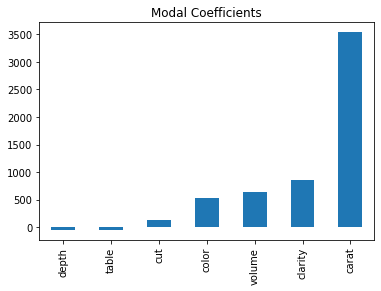

In [32]:
predictors = X_training.columns

coef = pd.Series(LARSreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Bayessian Ridge

In [33]:
from sklearn.linear_model import BayesianRidge

bayreg = BayesianRidge()

bayreg.fit(X_training, y_training) 

bayreg_pred = bayreg.predict(X_test)

In [34]:
bay_r2 = bayreg.score(X_test, y_test)

bay_rmse = mean_squared_error(y_test, bayreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",bay_r2,"rmse:",bay_rmse)

r2: 0.8977928935598211 rmse: 1292.4020491883766


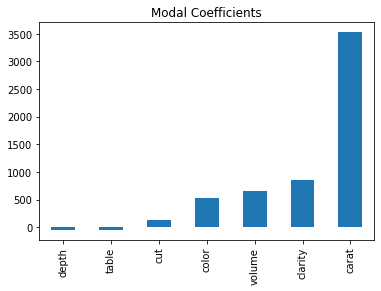

In [35]:
predictors = X_training.columns

coef = pd.Series(bayreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Robust Regressor: Huber

In [36]:
from sklearn.linear_model import HuberRegressor

hubreg = HuberRegressor()

hubreg.fit(X_training, y_training) 

hubreg_pred = hubreg.predict(X_test)

In [37]:
hub_r2 = hubreg.score(X_test, y_test)

hub_rmse = mean_squared_error(y_test, hubreg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",hub_r2,"rmse:",hub_rmse)

r2: 0.8767686866267873 rmse: 1419.1151285072829


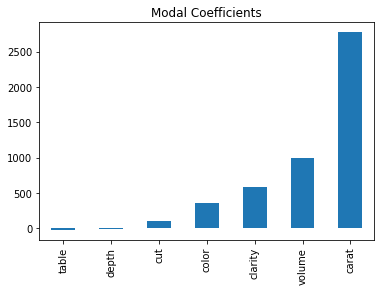

In [38]:
predictors = X_training.columns

coef = pd.Series(hubreg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

### Linear SVR

In [39]:
from sklearn.svm import LinearSVR

svrReg = LinearSVR()

svrReg.fit(X_training, y_training) 

svrReg_pred = svrReg.predict(X_test)

In [40]:
svr_r2 = svrReg.score(X_test, y_test)

svr_rmse = mean_squared_error(y_test, svrReg_pred, sample_weight=None, multioutput='uniform_average', squared=False)

print("r2:",svr_r2,"rmse:",svr_rmse)

r2: 0.8158020315281048 rmse: 1735.0001206827405


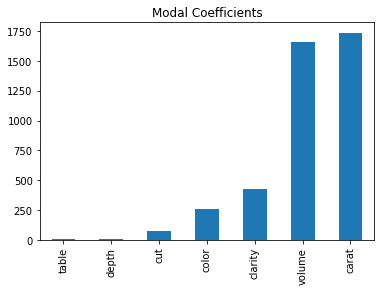

In [41]:
predictors = X_training.columns

coef = pd.Series(svrReg.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

#### We can see the best option by far is the Polynomial method. So this will be the one we will test in the new data

In [42]:
testdf = pd.read_csv("INPUT/diamonds_test.csv")
print(testdf.shape)
testdf.head()

(13449, 10)


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


#### Compute Volume

In [43]:
testdf["volume"] = testdf.x * testdf.y * testdf.z
index = testdf["Unnamed: 0"]
testdf.drop(columns={"Unnamed: 0","x","y","z"}, inplace=True)

In [44]:
test_ord = testdf

cut_dict = {
    "Fair":1, 
    "Good":2, 
    "Very Good":3, 
    "Premium":4, 
    "Ideal":5
}

color_dict = {
    "J":1,
    "I":2,
    "H":3, 
    "G":4, 
    "F":5, 
    "E":6, 
    "D":7
}

clarity_dict = {
    "I1":1, 
    "SI2":2, 
    "SI1":3, 
    "VS2":4, 
    "VS1":5,
    "VVS2":6,
    "VVS1":7,
    "IF":8
}

test_ord.cut = test_ord.cut.map(cut_dict)
test_ord.color = test_ord.color.map(color_dict)
test_ord.clarity = test_ord.clarity.map(clarity_dict)

In [45]:
test_ord.head()

,carat,cut,color,clarity,depth,table,volume
0,0.30,5,3,2,60.0,56.0,51.771195
1,0.34,5,7,8,62.1,57.0,56.244168
2,1.57,3,2,4,60.3,58.0,260.964240
3,0.31,5,3,4,61.8,57.0,50.478336
4,1.51,2,2,7,64.0,60.0,242.355498


In [46]:
Xss_test = sc_X.fit_transform(test_ord)

test_SS = pd.DataFrame(Xss_test, columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'volume'])

#### Now we train our models again but with 100% of the data and take the best

In [47]:
#test_pred = polyreg.predict(poly_f.fit_transform(test_SS))

In [48]:
"""test = pd.DataFrame(test_pred, columns={"price"})
test["id"] = index
test = test[["id","price"]]"""

'test = pd.DataFrame(test_pred, columns={"price"})\ntest["id"] = index\ntest = test[["id","price"]]'

In [49]:
#test.to_csv("OUTPUT/polynomial_ordinal.csv", index=False)

#### As conclusion, we have tested the Polynomial version in new data and the rmse increased from 630 in our test to 965, probably due to the presence of outliers